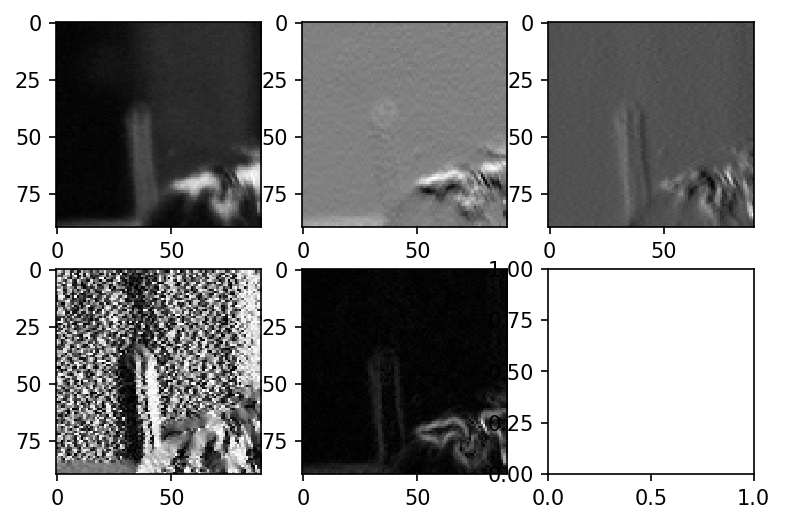

In [2]:
%load_ext autoreload
%autoreload 2

import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
plt.rcParams['image.cmap'] = 'gray'

image_rgb=skimage.io.imread("hog.png")
pos=50
l=3*6*5
image_rgb=image_rgb[pos:pos+l,pos:pos+l,:]
image=np.mean(image_rgb,axis=2)


gx,gy=np.gradient(image)
#angle=np.zeros_like(gx)
angle=np.abs(np.arctan2(gx,gy))
mag = np.sqrt(gx**2+gy**2)

f,((a1,a2,a3),(b1,b2,b3))=plt.subplots(2,3,dpi=150)
a1.imshow(image)
a2.imshow(gx)
a3.imshow(gy)
b1.imshow(angle)
b2.imshow(mag)
plt.show()


In [3]:
from hog import calculate_hog,calculate_descriptor_windows

pos=50
l=3*6*5
image_rgb=skimage.io.imread("hog.png")
image_subset=image_rgb[pos:pos+l,pos:pos+l,:]
hog=calculate_hog(image_subset)

descriptor_function= lambda image: calculate_hog(image)
hog_windows=calculate_descriptor_windows(image_rgb,descriptor_function)


print(len(hog_windows))
print(hog_windows[100])


713
(BoundingBox(r=120, c=280, h=90, w=90), array([ 0.        ,  0.07173185,  0.0661335 , ...,  0.16991592,
        0.11255005,  0.08829152]))
